<a href="https://colab.research.google.com/github/DerinOgrenme2021/Asl-GokmenUcar/blob/main/california_house_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#verileri yükleme
data = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

In [3]:
#verileri keşfediyor
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
#dataframe hakkında bilgileri yazdırdı
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff758f06e50>,
      dtype=object)

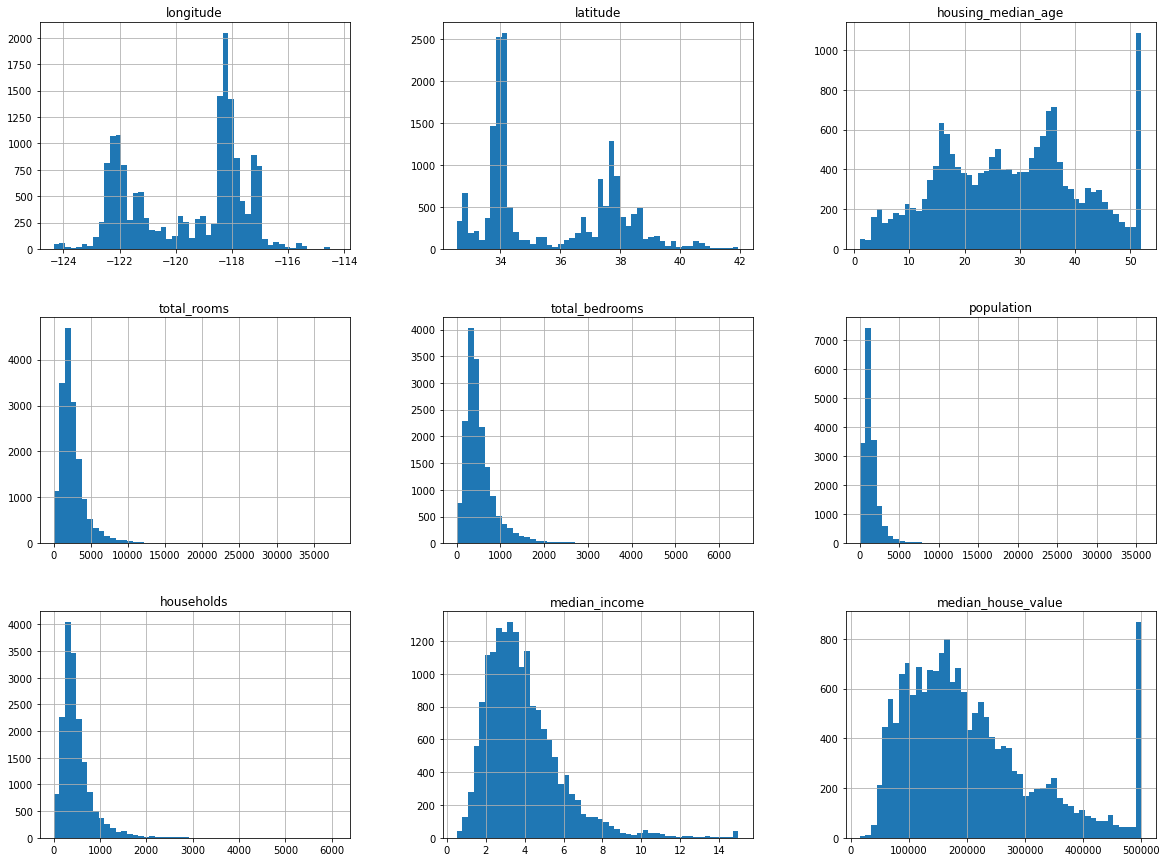

In [7]:
data.hist(bins=50, figsize=(20,15))

In [20]:
# median house value diğerlerinden çok farklı olarak 500000 civarında ani bir zirveye sahiptir. 
#Modeli eğitirken bu verilerin kaldırılması önerilir.
data['income_cat'] = np.ceil(data['median_income']/1.5)
data['income_cat'].where(data['income_cat']<5, 5, inplace=True)


(array([ 664.,    0., 5413.,    0.,    0., 5919.,    0., 3029.,    0.,
        1975.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

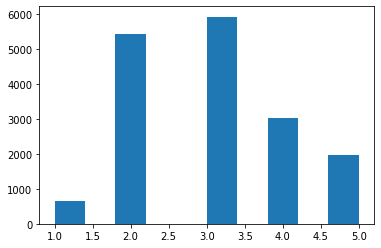

In [21]:
plt.hist(data.income_cat)

In [22]:
data.income_cat.value_counts()/len(data.income_cat)

3.0    0.348176
2.0    0.318412
4.0    0.178176
5.0    0.116176
1.0    0.039059
Name: income_cat, dtype: float64

In [24]:
# verileri yeni özelliğe göre train ve test setlerine ayırın
#StratifiedShuffleSplit paketini yeni özellikle birlikte kullanma
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.model_selection import train_test_split
data4train,data4test = train_test_split(data, test_size=0.2, random_state=42)
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 42)
for train_index, test_index in split.split(data, data['income_cat']):
    train_set = data.loc[train_index]
    test_set  = data.loc[test_index] 

In [26]:
# yeni özelliği siliyoruz artık
for set_ in (data, data4train, data4test, train_set, test_set):
    set_.drop("income_cat",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
data4train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [29]:
housing4train = train_set.copy()

In [30]:
housing4train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
693,-117.05,33.11,18.0,4393.0,642.0,2095.0,677.0,5.4786,223500.0
13522,-121.96,37.28,28.0,5018.0,1066.0,2846.0,998.0,4.0174,273900.0
2530,-117.64,34.06,43.0,763.0,219.0,851.0,198.0,1.7292,79200.0
5689,-118.18,33.78,17.0,1419.0,436.0,1300.0,360.0,2.0769,100000.0
4607,-118.06,33.91,36.0,1360.0,271.0,909.0,275.0,4.6731,173300.0


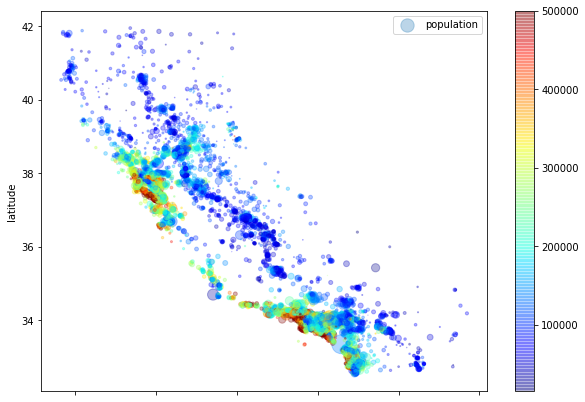

In [31]:
housing4train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3,
         s=housing4train['population']/100, label='population',   # set symbol size on population
         c=housing4train['median_house_value'],                  #  set symbol color on house value    
         cmap=plt.get_cmap('jet'),      
         colorbar=True,
         figsize=(10,7))
plt.legend()

In [ ]:
#Evin değerinin daha çok nüfus ve konuma bağlı olduğunu görüyoruz

In [32]:
import folium

from geopy.geocoders import Nominatim 

In [33]:
def get_latlon(address):
    geolocator = Nominatim()
    location   = geolocator.geocode(address)
    latitude   = location.latitude
    longitude  = location.longitude
    return latitude, longitude

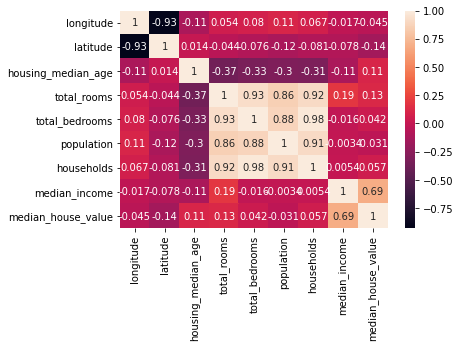

In [34]:
#özellikler arasındaki ilişkiyi görmek için
sns.heatmap(housing4train.corr(),annot=True)


In [35]:
corr_matrix = housing4train.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690264
total_rooms           0.126292
housing_median_age    0.109845
households            0.057418
total_bedrooms        0.041573
population           -0.030684
longitude            -0.044802
latitude             -0.144512
Name: median_house_value, dtype: float64

In [36]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.926306,-0.112277,0.053942,0.080040,0.109900,0.067425,-0.016611,-0.044802
latitude,-0.926306,1.000000,0.013914,-0.044170,-0.076183,-0.117926,-0.081393,-0.077570,-0.144512
housing_median_age,-0.112277,0.013914,1.000000,-0.367219,-0.327593,-0.302844,-0.309460,-0.112649,0.109845
total_rooms,0.053942,-0.044170,-0.367219,1.000000,0.927694,0.860759,0.917108,0.192185,0.126292
total_bedrooms,0.080040,-0.076183,-0.327593,0.927694,1.000000,0.883148,0.979935,-0.015644,0.041573
population,0.109900,-0.117926,-0.302844,0.860759,0.883148,1.000000,0.912834,-0.003404,-0.030684
households,0.067425,-0.081393,-0.309460,0.917108,0.979935,0.912834,1.000000,0.005404,0.057418
median_income,-0.016611,-0.077570,-0.112649,0.192185,-0.015644,-0.003404,0.005404,1.000000,0.690264
median_house_value,-0.044802,-0.144512,0.109845,0.126292,0.041573,-0.030684,0.057418,0.690264,1.000000


In [37]:
df = corr_matrix.tail(1).T
df

,median_house_value
longitude,-0.044802
latitude,-0.144512
housing_median_age,0.109845
total_rooms,0.126292
total_bedrooms,0.041573
population,-0.030684
households,0.057418
median_income,0.690264
median_house_value,1.000000


In [38]:
df.sort_values(by='median_house_value',inplace=True) 
df

,median_house_value
latitude,-0.144512
longitude,-0.044802
population,-0.030684
total_bedrooms,0.041573
households,0.057418
housing_median_age,0.109845
total_rooms,0.126292
median_income,0.690264
median_house_value,1.000000


In [46]:
features = list(df[abs(df['median_house_value'])>0.1].T.columns)
features

['latitude',
 'housing_median_age',
 'total_rooms',
 'median_income',
 'median_house_value']

In [47]:
from pandas.plotting import scatter_matrix
from plotly.graph_objs import Scatter,Layout
import plotly
import plotly.offline as py
import plotly.graph_objs as go

In [48]:
plotly.offline.init_notebook_mode(connected=True)

In [49]:
trace0 = go.Scatter(x=data['median_income'], y=data['median_house_value'], mode = 'markers', name = 'value vs income')

In [ ]:
#Toplam oda nüfus belirtilmemiş ise, belli bir bölgedeki  ev fiyatına ilişkili değildir.
# Ev fiyatı için daha ilişkili değişken, bir evde yaşayan kişi sayısıdır. 
#Bu nedenle, population_per_household yeni bir öznitelik tanıtılabilir .

In [50]:
housing4train['population_per_household'] = housing4train['population']/housing4train['households']


In [51]:
housing4train['bedrooms_per_room'] = housing4train['total_bedrooms']/housing4train['total_rooms']
housing4train['rooms_per_household'] = housing4train['total_rooms']/housing4train['households']

In [52]:
corr_matrix = housing4train.corr() 

In [53]:
df = pd.DataFrame(corr_matrix['median_house_value'])
df.sort_values(by='median_house_value',inplace=True)

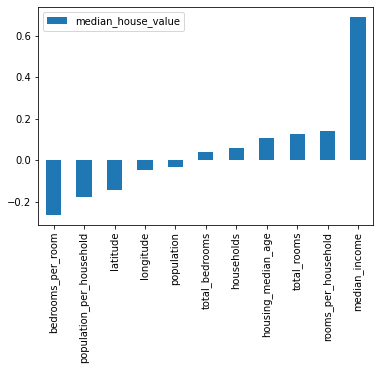

In [54]:
df.drop(index='median_house_value',inplace=True)
df.plot(kind='bar')

In [55]:
features = list(df[abs(df['median_house_value'])>0.15].T.columns)
features

['bedrooms_per_room', 'population_per_household', 'median_income']

In [56]:
X_train = data4train.drop("median_house_value",axis=1)
y_train = data4train["median_house_value"].copy()

In [59]:
X_train.shape,y_train.shape

((13600, 8), (13600,))

In [58]:
X_test = data4test.drop("median_house_value",axis=1)
y_test = data4test["median_house_value"].copy()

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

#Modeli derliyoruz
model.compile(optimizer='adam', loss='mse')

In [62]:
#Modeli eğitiyoruz
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=100, callbacks=[early_stop])

Epoch 1/100
107/107 [==============================] - 1s 3ms/step - loss: 56095907840.0000 - val_loss: 57741463552.0000
Epoch 2/100
107/107 [==============================] - 0s 2ms/step - loss: 56095514624.0000 - val_loss: 57740783616.0000
Epoch 3/100
107/107 [==============================] - 0s 2ms/step - loss: 56094380032.0000 - val_loss: 57739177984.0000
Epoch 4/100
107/107 [==============================] - 0s 2ms/step - loss: 56092209152.0000 - val_loss: 57736302592.0000
Epoch 5/100
107/107 [==============================] - 0s 2ms/step - loss: 56088690688.0000 - val_loss: 57731862528.0000
Epoch 6/100
107/107 [==============================] - 0s 2ms/step - loss: 56083660800.0000 - val_loss: 57725677568.0000
Epoch 7/100
107/107 [==============================] - 0s 2ms/step - loss: 56076521472.0000 - val_loss: 57717002240.0000
Epoch 8/100
107/107 [==============================] - 0s 2ms/step - loss: 56065433600.0000 - val_loss: 57704800256.0000
Epoch 9/100
107/107 [===========